###CS 181, Spring 2016
Homework 1, Problem 3

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
csv_filename = 'congress-ages.csv'
times  = []
ages = []

with open(csv_filename, 'r') as csv_fh:

    # Parse as a CSV file.
    reader = csv.reader(csv_fh)

    # Skip the header line.
    next(reader, None)

    # Loop over the file.
    for row in reader:

        # Store the data.
        times.append(float(row[0]))
        ages.append(float(row[1]))

# Turn the data into numpy arrays.
times  = np.array(times)
ages = np.array(ages)

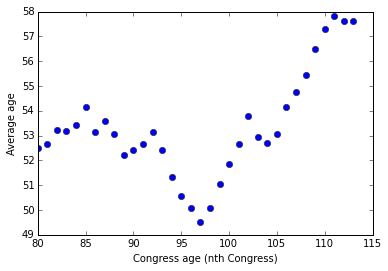

In [3]:
# Plot the data.
plt.plot(times, ages, 'o')
plt.xlabel("Congress age (nth Congress)")
plt.ylabel("Average age")
plt.show()

In [4]:
# Create the simplest basis, with just the time and an offset.
X = np.vstack((np.ones(times.shape), times)).T

In [5]:
# Nothing fancy for outputs.
Y = ages

In [6]:
# Find the regression weights using the Moore-Penrose pseudoinverse.
w = np.linalg.solve(np.dot(X.T, X) , np.dot(X.T, Y))

In [7]:
# Compute the regression line on a grid of inputs.
# DO NOT CHANGE grid_times!!!!!
grid_times = np.linspace(75, 120, 200)
grid_X = np.vstack((np.ones(grid_times.shape), grid_times))
grid_Yhat  = np.dot(grid_X.T, w)

In [18]:
grid_times.shape

(200,)

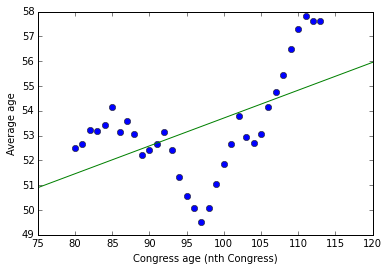

In [8]:
# Plot the data and the regression line.
plt.plot(times, ages, 'o', grid_times, grid_Yhat, '-')
plt.xlabel("Congress age (nth Congress)")
plt.ylabel("Average age")
plt.show()

### Part (a)

In [37]:
x_a = np.ones(times.shape) # create initial vetor of ones
for i in range(1,8):
    x_a = np.vstack((x_a, np.power(times,i))) # create additional vectors for incremental powers i
x_a = x_a.T

In [38]:
w_a = np.linalg.solve(np.dot(x_a.T, x_a), np.dot(x_a.T, Y)) # create weights (coefficients) for each vector

grid_x_a = np.ones(grid_times.shape) # intercepts
for i in range(1,8):
    grid_x_a = np.vstack((grid_x_a, np.power(grid_times, i))) # stack vectors
grid_Yhat_a  = np.dot(grid_x_a.T, w_a) # get predicted ys from weights

In [39]:
print x_a.shape
print w_a.shape
print grid_x_a.shape
print grid_Yhat_a.shape

(34, 8)
(8,)
(8, 200)
(200,)


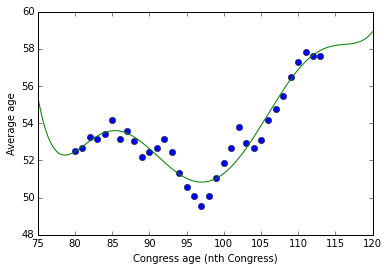

In [40]:
plt.plot(times, ages, 'o', grid_times, grid_Yhat_a, '-')
plt.xlabel("Congress age (nth Congress)")
plt.ylabel("Average age")
plt.show()

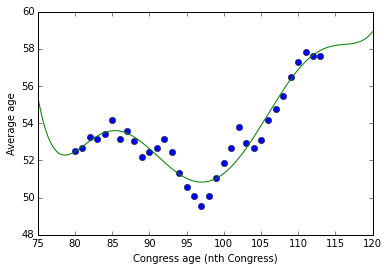

In [49]:
### part a
x_a = np.ones(times.shape) # create initial vetor of ones
for i in range(1,8):
    x_a = np.vstack((x_a, np.power(times,i))) # create additional vectors for incremental powers i
x_a = x_a.T

w_a = np.linalg.solve(np.dot(x_a.T, x_a), np.dot(x_a.T, Y)) # create weights (coefficients) for each vector

grid_x_a = np.ones(grid_times.shape) # intercepts
for i in range(1,8):
    grid_x_a = np.vstack((grid_x_a, np.power(grid_times, i))) # stack vectors
grid_Yhat_a  = np.dot(grid_x_a.T, w_a) # get predicted ys from weights

plt.plot(times, ages, 'o', grid_times, grid_Yhat_a, '-')
plt.xlabel("Congress age (nth Congress)")
plt.ylabel("Average age")
plt.show()

In [ ]:
# The fit appears to do well in this plot, except in the lower tail where the data do not reflect the trend line.
# However, the main concern here is overfitting. We have only 34 data points, yet we are using 7 coefficients to
# perform our regression.

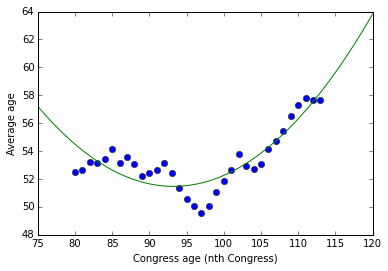

In [42]:
### part b
x_a = np.ones(times.shape) # create initial vetor of ones
for i in range(1,3):
    x_a = np.vstack((x_a, np.power(times,i))) # create additional vectors for incremental powers i
x_a = x_a.T

w_a = np.linalg.solve(np.dot(x_a.T, x_a), np.dot(x_a.T, Y)) # create weights (coefficients) for each vector

grid_x_a = np.ones(grid_times.shape) # intercepts
for i in range(1,3):
    grid_x_a = np.vstack((grid_x_a, np.power(grid_times, i))) # stack vectors
grid_Yhat_a  = np.dot(grid_x_a.T, w_a) # get predicted ys from weights

plt.plot(times, ages, 'o', grid_times, grid_Yhat_a, '-')
plt.xlabel("Congress age (nth Congress)")
plt.ylabel("Average age")
plt.show()

In [ ]:
# The fit is not as good as in part (a), and we definitely don't seem to be capturing any useful information in the
# tails (which seem to plateau somewhat). But here we use far fewer degrees of freedom (coefficients) to fit the 
# regression, which is a plus. 

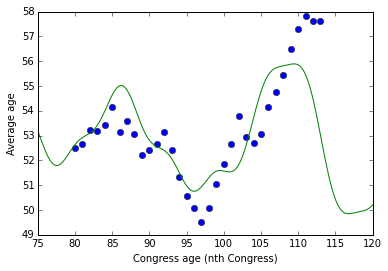

In [46]:
### part c
x_a = np.ones(times.shape) # create initial vetor of ones
for i in range(1,5):
    x_a = np.vstack((x_a, np.sin(times/i))) # create additional vectors for incremental i
x_a = x_a.T

w_a = np.linalg.solve(np.dot(x_a.T, x_a), np.dot(x_a.T, Y)) # create weights (coefficients) for each vector

grid_x_a = np.ones(grid_times.shape) # intercepts
for i in range(1,5):
    grid_x_a = np.vstack((grid_x_a, np.sin(grid_times/i))) # stack vectors
grid_Yhat_a  = np.dot(grid_x_a.T, w_a) # get predicted ys from weights

plt.plot(times, ages, 'o', grid_times, grid_Yhat_a, '-')
plt.xlabel("Congress age (nth Congress)")
plt.ylabel("Average age")
plt.show()

In [ ]:
# This plot (c) is more or less a compromise of the previous plots, since it uses fewer degrees of freedom than (a)
# yet provides slightly better fit than (b). However, it seems like we could get by with fewer degrees of freedom
# since there are some unnecessary "wiggles" in the regression line. Also, there is a disconnect between the data and
# the regression line in the tails.

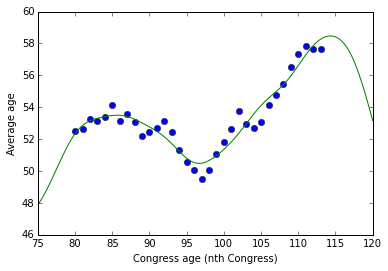

In [47]:
### part d
x_a = np.ones(times.shape) # create initial vetor of ones
for i in range(1,8):
    x_a = np.vstack((x_a, np.sin(times/i))) # create additional vectors for incremental i
x_a = x_a.T

w_a = np.linalg.solve(np.dot(x_a.T, x_a), np.dot(x_a.T, Y)) # create weights (coefficients) for each vector

grid_x_a = np.ones(grid_times.shape) # intercepts
for i in range(1,8):
    grid_x_a = np.vstack((grid_x_a, np.sin(grid_times/i))) # stack vectors
grid_Yhat_a  = np.dot(grid_x_a.T, w_a) # get predicted ys from weights

plt.plot(times, ages, 'o', grid_times, grid_Yhat_a, '-')
plt.xlabel("Congress age (nth Congress)")
plt.ylabel("Average age")
plt.show()

In [ ]:
# This plot (d) is more accurate than plot (c), capturing the information in the tails far better than before. However,
# as in part (a) we are using many degrees of freedom so there is concern for overfitting. 

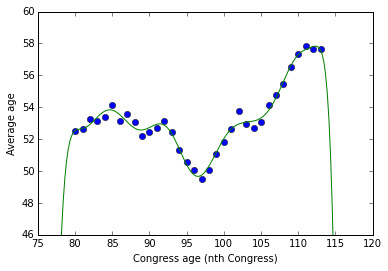

In [50]:
### part e
x_a = np.ones(times.shape) # create initial vetor of ones
for i in range(1,21):
    x_a = np.vstack((x_a, np.sin(times/i))) # create additional vectors for incremental i
x_a = x_a.T

w_a = np.linalg.solve(np.dot(x_a.T, x_a), np.dot(x_a.T, Y)) # create weights (coefficients) for each vector

grid_x_a = np.ones(grid_times.shape) # intercepts
for i in range(1,21):
    grid_x_a = np.vstack((grid_x_a, np.sin(grid_times/i))) # stack vectors
grid_Yhat_a  = np.dot(grid_x_a.T, w_a) # get predicted ys from weights

plt.plot(times, ages, 'o', grid_times, grid_Yhat_a, '-')
plt.ylim(46,60)
plt.xlim(75,120)
plt.xlabel("Congress age (nth Congress)")
plt.ylabel("Average age")
plt.show()

In [ ]:
# Obviously, this is the best fit of any plot so far. With so many degrees of freedom, we capture nearly every point
# perfectly. However, the overfitting is too much to make any meaningful inference. Perhaps the only use here is
# identifying potential outliers (i.e., between 100-105th congress).